In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd

In [94]:
def loss_function_correlation_fig(
    path_ims_corr_csv, path_femto_corr_csv, path_save_name, dpi=300
):
    dfi = pd.read_csv(path_ims_corr_csv)
    dfp = pd.read_csv(path_femto_corr_csv)

    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10, 12),
    )

    title_list = [
        r"$\bf{(a)}$" + " IMS Correlation of Loss Functions with Test $R^2$",
        r"$\bf{(b)}$" + " PRONOSTIA Correlation of Loss Functions with Test $R^2$",
    ]

    df_list = [dfi, dfp]

    for top_bot_i, (ax, df, title) in enumerate(zip(axes.flat, df_list, title_list)):

        df = df.dropna(axis=0)

        ax = sns.barplot(x="loss_func", y="corr", ax=ax, palette="rocket", data=df)
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=90,
        )

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)
        # ax.axes.get_yaxis().set_visible(False) # hide y-axis
        ax.grid(alpha=0.7, linewidth=1, axis="y")
        ax.xaxis.set_label_text("", size="large", weight="semibold")
        ax.yaxis.set_label_text("", size="large", weight="semibold")
        ax.set_yticks([0])
        ax.set_yticklabels([], alpha=0)
        ax.set_xticklabels([], alpha=0)

        for i, p in enumerate(ax.patches):
            # help from https://stackoverflow.com/a/56780852/9214620
            space = np.absolute(df["corr"].max() * 0.1)

            value = p.get_height()
            if value >= 0:
                _y = p.get_y() + p.get_height() + float(space)
                _x = p.get_x() + p.get_width() / 2
                ax.text(
                    _x,
                    _y,
                    f"{value:.2f}",
                    ha="center",
                    va="center",
                    weight="semibold",
                    size=15,
                )
                ax.text(
                    _x + 0.2,
                    -0.01,
                    df["loss_func"][i],
                    ha="right",
                    va="top",
                    weight="normal",
                    multialignment="right",
                    size=15,
                    rotation=65,
                )

            else:
                _y = p.get_y() + p.get_height() - float(space)
                _x = p.get_x() + p.get_width() / 2
                ax.text(
                    _x,
                    _y,
                    f"{value:.2f}",
                    ha="center",
                    va="center",
                    weight="semibold",
                    size=15,
                )
                ax.text(
                    _x - 0.2,
                    0.01,
                    df["loss_func"][i],
                    ha="left",
                    va="bottom",
                    weight="normal",
                    multialignment="left",
                    size=15,
                    rotation=65,
                )
                
        if top_bot_i == 1:
            text_bracket = "Not statistically significant"
            ax.annotate(text_bracket, xy=(3.5, -0.13),  xycoords='data',
                xytext=(3.5, -0.18), textcoords='data', font="DejaVu Sans",
                arrowprops=dict(color='.15', arrowstyle='-[, widthB=4.8, lengthB=1.0', lw=2.0),
                horizontalalignment='center', verticalalignment='bottom',)

        plt.rcParams["axes.titlepad"] = 20
        ax.set_title(title, loc="left", size=15)

    plt.subplots_adjust(hspace=0.3)
    plt.savefig(path_save_name, dpi=dpi, bbox_inches="tight")
    plt.cla()
    plt.close()
    plt.show()

/home/tim/Documents/weibull-knowledge-informed


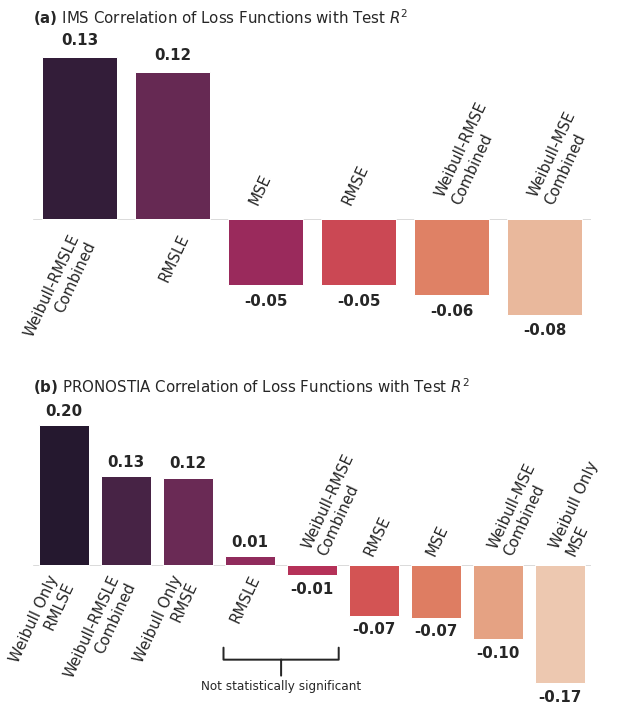

In [93]:
sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans")

root_dir = Path.cwd().parent.parent
print(root_dir)

# csv result locations
path_results = root_dir / "models/final/"
path_save_loc = root_dir / "reports/figures/"

loss_function_correlation_fig(
    path_results / "ims_correlation_results.csv",
    path_results / "femto_correlation_results.csv",
    path_save_loc / "correlations.svg",
)

In [76]:
plt.style.context(("seaborn-whitegrid",))

In [77]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['DejaVu Sans'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}